# Дискретные случайные процессы и временные ряды, DS-поток
## Задание TS.5
### Поиск аномалий во временных рядах. Современные средства анализа временных рядов.

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.** 
  * Задача 1 &mdash; 80 баллов.
  * Задача 2 &mdash; 100 баллов.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Поправил код, перезапустил после дедлайна</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [11]:
# Bot check

# HW_ID: ds_ts5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
!pip uninstall wandb
!pip install wandb

In [ ]:
!pip install etna

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
import sesd
import rrcf
from sklearn.cluster import DBSCAN
from etna.datasets import TSDataset
from etna.models import CatBoostMultiSegmentModel
from etna.transforms import LagTransform, DateFlagsTransform, FourierTransform, MeanTransform, YeoJohnsonTransform, SegmentEncoderTransform
from etna.pipeline import Pipeline
from etna.metrics import MAE
from etna.analysis import plot_forecast

c:\Python39\lib\site-packages\etna\settings.py:37: UserWarning: etna[torch] is not available, to install it, run `pip install etna[torch]`
  warnings.warn("etna[torch] is not available, to install it, run `pip install etna[torch]`")
c:\Python39\lib\site-packages\etna\settings.py:66: UserWarning: etna[timesfm] is not available, to install it, run `pip install etna[timesfm]`
  warnings.warn("etna[timesfm] is not available, to install it, run `pip install etna[timesfm]`")
c:\Python39\lib\site-packages\etna\settings.py:91: UserWarning: etna[classification] is not available, to install it, run `pip install etna[classification]`
  warnings.warn("etna[classification] is not available, to install it, run `pip install etna[classification]`")
c:\Python39\lib\site-packages\etna\settings.py:108: UserWarning: etna[statsforecast] is not available, to install it, run `pip install etna[statsforecast]`
  warnings.warn("etna[statsforecast] is not available, to install it, run `pip install etna[statsfore

AttributeError: module 'wandb.proto.wandb_internal_pb2' has no attribute 'Result'

---

### Задача 1

Вам [выдана](https://disk.yandex.ru/d/d9uxKFsst-YBkA) часть информации о визитах пользователей на сайте Физтех.Статистики начиная с 2020 года по данным Яндекс.Метрики. Визит — последовательность действий пользователя на сайте, которая
начинается на некоторой странице сайта, содержит в себе переходы по ссылкам (и другие действия), и
заканчивается на какой-то, возможно, другой страницей сайта. Визит считается завершенным, если
активность отсутствует в течение некоторого времени, обычно — 30 минут.
Описание полей доступно по [ссылке](https://yandex.ru/dev/metrika/doc/api2/logs/fields/visits.html).

Для начала загрузим данные. Нас будет интересовать общее количество посещений по дням. Постройте график временного ряда, что можно о нем сказать?

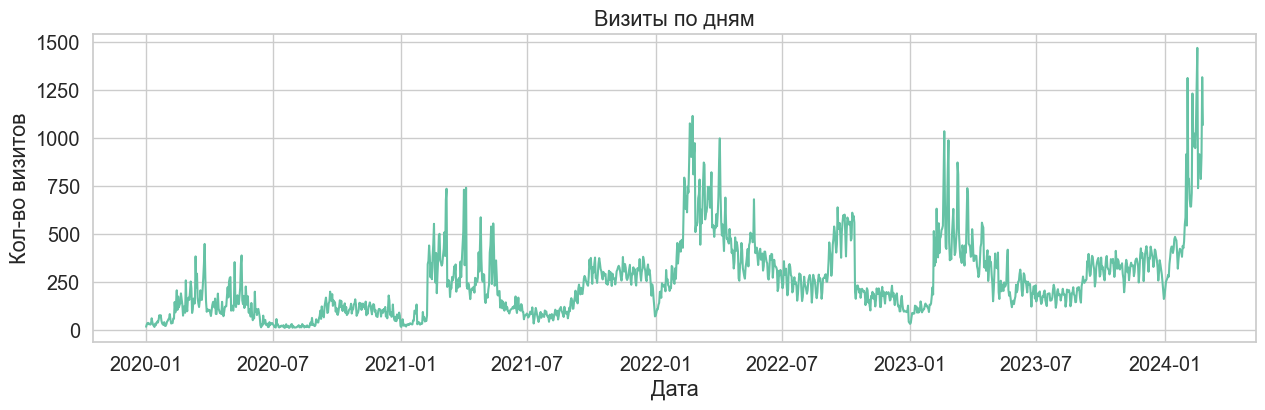

In [ ]:
df = pd.read_csv('miptstats_metrica.tsv', sep='\t')
df['ym:s:dateTimeUTC'] = pd.to_datetime(df['ym:s:dateTimeUTC'])
df['date'] = df['ym:s:dateTimeUTC'].dt.date
df = df.groupby('date')['ym:s:visitID'].count()  # исходная табличка больше не понадобится, оставим только сгруппированную

def plot(ts, title, anomal=None):
    """Визуализация временного ряда и точек-аномалий"""
    plt.figure(figsize=(15,4))
    plt.title(title)
    plt.xlabel("Дата")
    plt.ylabel("Кол-во визитов")
    plt.plot(ts)
    if anomal is not None:
        plt.scatter(ts.iloc[anomal].index, ts.iloc[anomal].values, color='red', marker='o', s=50, zorder=2)
    plt.show()

plot(df, "Визиты по дням")

Задачи:
* Найти аномалии в предоставленных временных рядах постфактум, то есть построить оффлайн-модель. Попробуйте применить методы на основе фильтрации или метрические методы с использованием, например, DBSCAN.
* Построить онлайн-модель детектирования аномалий.

Попробуйте проинтерпретировать найденные аномалии. С чем они могут быть связаны?

*Замечание.*

Если будете использовать метод Seasonal ESD, то можете воспользоваться библиотекой [`sesd`](https://pypi.org/project/sesd/).

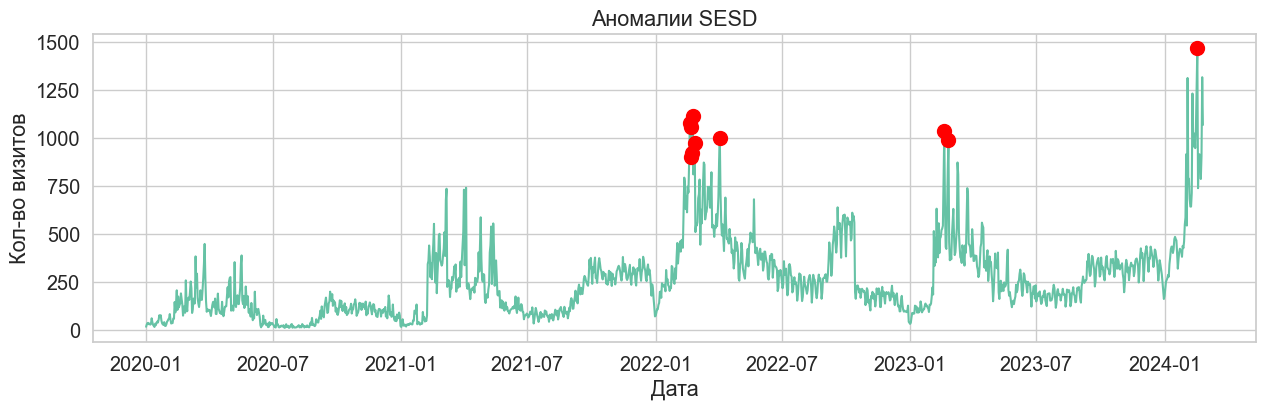

In [25]:
sesd_anomal = sesd.seasonal_esd(df.values, hybrid=True)
plot(df, "Аномалии SESD", sesd_anomal)

*Аномалии найдены в логичных местах - "пиках"*

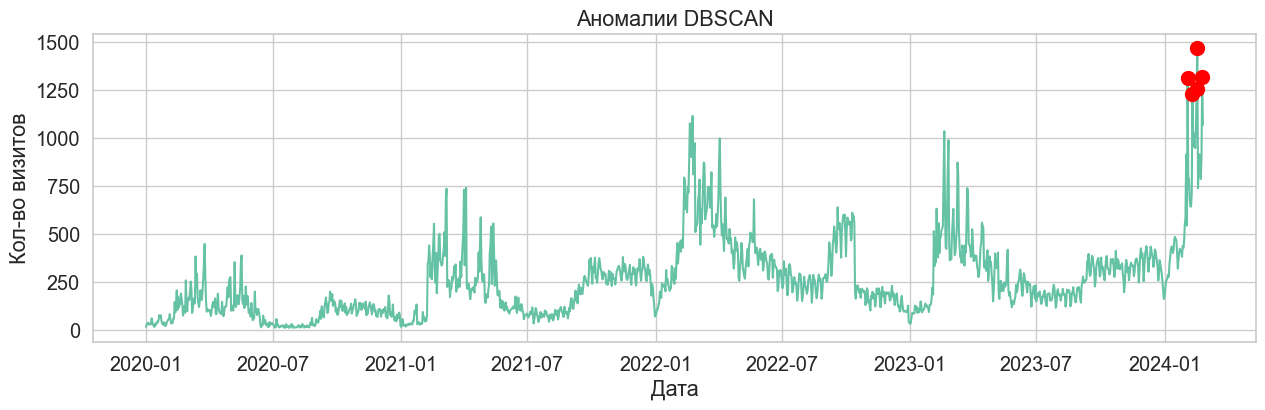

In [ ]:
df_scaled = df.copy()
df_scaled = (df_scaled-df_scaled.mean())/df_scaled.std()  # масштабирование критично для метрических методов
dbscan_anomal = np.argwhere(DBSCAN().fit(np.expand_dims(df_scaled.to_numpy(), axis=1)).labels_ == -1)[:,0]
plot(df, "Аномалии DBSCAN", dbscan_anomal)

*Аномалий нашлось поменьше: только в самых высоких пиках в конце истории наблюдений*

(0.0, 160.0)

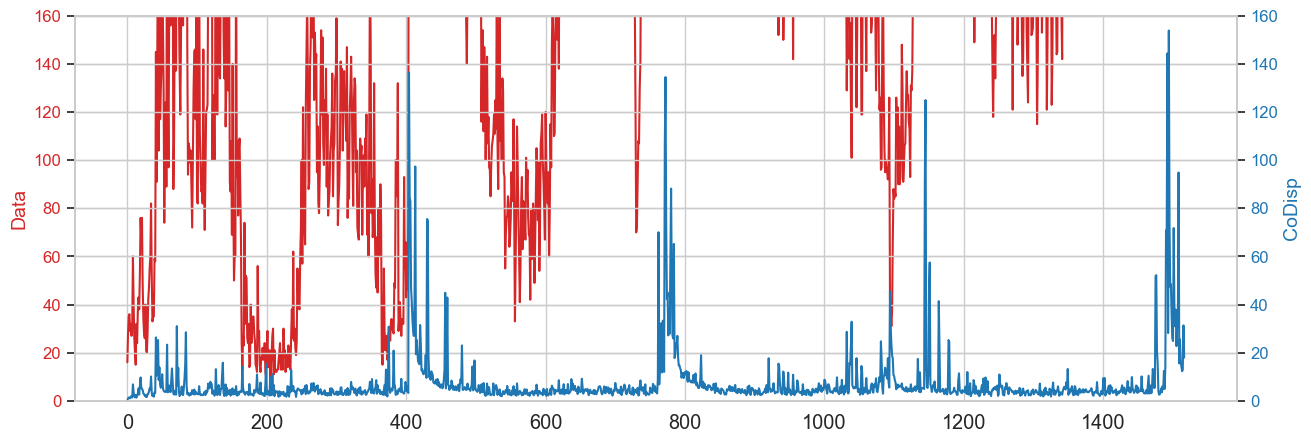

In [ ]:
num_trees, shingle_size, tree_size = 40, 4, 256
forest, avg_codisp = [rrcf.RCTree() for _ in range(num_trees)], {}
for index, point in enumerate(df.values):
    for tree in forest:
        if len(tree.leaves) > tree_size:
            tree.forget_point(index - tree_size)
        tree.insert_point(point, index=index)
        new_codisp = tree.codisp(index)
        if not index in avg_codisp:
            avg_codisp[index] = 0
        avg_codisp[index] += new_codisp / num_trees

fig, ax1 = plt.subplots(figsize=(15, 5))
color = "tab:red"  # Ряд данных
ax1.set_ylabel("Data", color=color, size=14)
ax1.plot(df.values, color=color)
ax1.tick_params(axis="y", labelcolor=color, labelsize=12)
ax1.set_ylim(0, 160)
ax2 = ax1.twinx()  # Ряд степени аномальности точек
color = "tab:blue"
ax2.set_ylabel("CoDisp", color=color, size=14)
ax2.plot(pd.Series(avg_codisp).sort_index(), color=color)
ax2.tick_params(axis="y", labelcolor=color, labelsize=12)
ax2.grid("off")
ax2.set_ylim(0, 160)
for border in [235, 255]:  # Место аномальности
    ax1.axvline(border, color="black", ls="--", alpha=0.2)

*Кажется, rrcf просто задетектировал сезонные всплечки вместо аномалий*

*Вывод: в этой задаче мы нашли аномалии в данных с помощью нескольких методов*

---

### Задача 2

Как и прежде, будем работать с [данными](https://www.kaggle.com/c/demand-forecasting-kernels-only/overview) соревнования по прогнозированию спроса на товары. Рассмотрите 5 некоторых магазинов и 20 товаров, которые продаются в них. Таким образом, вам предлагается работать с 100 временными рядами. Как и до этого, разделите данные на обучение и тест, оставив для прогнозирования 365 последних измерений. 

С использованием какого-нибудь фреймворка для работы с временными рядами, например, [ETNA](https://github.com/etna-team/etna), реализуйте и сравните следующие подходы к прогнозированию:

* Одна модель на все временные ряды
* Одна модель на товар, идентификатор магазина можно использовать как признак.
* Одна модель на магазин, идентификатор товара можно использовать как признак.
* Одна модель на каждый временной ряд, итого 100 моделей.

Используйте ML модель для табличных данных, например, какой-нибудь бустинг. Сравните результаты по метрике MAE, сделайте выводы.

<b><font color="#00b565" size="5">Поправил код, перезапустил после дедлайна</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>---</i>

In [ ]:
df = pd.read_csv("train.csv")
stores, items = [1,3,4,7,10], list(range(1,21))
df = df[df.apply(lambda x: x["store"] in set(stores) and x["item"] in set(items), axis=1)]
df["segment"] = df["store"].astype(str).str.cat(df["item"].astype(str), sep="_")
df.rename(columns={"sales":"target", "date":"timestamp"}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_endog, df_exog = df[["timestamp","segment","target"]], df[["timestamp","segment","store","item"]]
df.head(3)

,timestamp,store,item,target,segment
0,2013-01-01,1,1,13,1_1
1,2013-01-02,1,1,11,1_1
2,2013-01-03,1,1,14,1_1


In [ ]:
HORIZON = 365
transforms = [
    YeoJohnsonTransform(in_column="target", inplace=True),
    LagTransform(in_column="target", lags=[HORIZON+i for i in range(100)], out_column="lag"),
    DateFlagsTransform(day_number_in_week=True, day_number_in_month=True, is_weekend=True, out_column="date_flag"),
    FourierTransform(period=365, order=20),
    MeanTransform(in_column=f"lag_{HORIZON}", window=10, seasonality=7),
]
pipelines = {}

def train_pipeline(df_endog, segm_cond):
    valid_dataset = df_endog[segm_cond]
    ts = TSDataset(df=TSDataset.to_dataset(valid_dataset), freq="D")
    train_ts, _ = ts.train_test_split(test_size=HORIZON)
    pipeline = Pipeline(model=CatBoostMultiSegmentModel(), transforms=transforms + [SegmentEncoderTransform()], horizon=HORIZON)
    pipeline.fit(train_ts)
    return pipeline

ts = TSDataset(df=TSDataset.to_dataset(df_endog), freq="D")
train_ts, test_ts = ts.train_test_split(test_size=HORIZON)
pipelines['one_for_all'] = train_pipeline(df_endog, df_endog.index)
pipelines['one_for_store'] = [train_pipeline(df_endog, df_endog["segment"].str.split('_').apply(lambda x: int(x[0])==store)) for store in stores]
pipelines['one_for_item'] = [train_pipeline(df_endog, df_endog["segment"].str.split('_').apply(lambda x: int(x[1])==item)) for item in items]
pipelines['one_for_item_store'] = [
    train_pipeline(df_endog, df_endog["segment"].str.split('_').apply(lambda x: int(x[1])==item) & df_endog["segment"].str.split('_').apply(lambda x: int(x[0])==store))
    for item in items for store in stores
]

for k in pipelines.keys():
    metrics, forecast, fold_info = pipelines[k].backtest(ts=ts, metrics=[MAE()], n_folds=1)

*я всё обучил, но потом ноутбук упал, к дедлайну перезапустить не успевал(*

UPD: перезапустил

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>